# "Analisis Data Sosial Media: Menggabungkan Informasi Pengguna, Jaringan, dan Interaksi"

https://www.kaggle.com/datasets/iqbalrony/relational-data-engineering

# Tahap 1 : DATA WRANGLING

Import Libraries



In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
# this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window
%matplotlib inline

Data Loading and Exploration |

In [69]:
users = pd.read_csv('https://raw.githubusercontent.com/cayaaa14/data-real/refs/heads/main/user_table.csv')
friends = pd.read_csv('https://raw.githubusercontent.com/cayaaa14/data-real/refs/heads/main/friends_table.csv')
posts = pd.read_csv('https://raw.githubusercontent.com/cayaaa14/data-real/refs/heads/main/posts_table.csv')
reactions = pd.read_csv('https://raw.githubusercontent.com/cayaaa14/data-real/refs/heads/main/reactions_table.csv')


A. Tabel Users

In [70]:
# Let's have a look on top 5 rows of the data
users.head(5)

,Surname,Name,Age,Subscription Date
0,Smith,Sarah,30,1588157373
1,Picard,Francine,32,1588161732
2,Roth,Hans,40,1588157337
3,Pomme,Ali,28,1588165636
4,Di Lillo,Jordi,42,1588156042


In [71]:
users.columns

Index(['Surname', 'Name', 'Age', 'Subscription Date'], dtype='object')

In [72]:
print(f"The Number of Rows are {users.shape[0]}, and columns are {users.shape[1]}.")

The Number of Rows are 1000, and columns are 4.


In [73]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Surname            1000 non-null   object
 1   Name               1000 non-null   object
 2   Age                1000 non-null   int64 
 3   Subscription Date  1000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [74]:
users.isnull().sum()

,0
Surname,0
Name,0
Age,0
Subscription Date,0


Ubah tipe data int pada Subscription Date jadi Datetime

In [75]:
users['Subscription Date'] = pd.to_datetime(users['Subscription Date'], unit='s')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Surname            1000 non-null   object        
 1   Name               1000 non-null   object        
 2   Age                1000 non-null   int64         
 3   Subscription Date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 31.4+ KB


B. Tabel friends

In [76]:
# Let's have a look on top 5 rows of the data
friends.head(5)

,Friend 1,Friend 2
0,1,555
1,1,921
2,1,213
3,1,184
4,1,242


In [77]:
friends.columns

Index(['Friend 1', 'Friend 2'], dtype='object')

In [78]:
print(f"The Number of Rows are {friends.shape[0]}, and columns are {friends.shape[1]}.")

The Number of Rows are 9402, and columns are 2.


In [79]:
friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9402 entries, 0 to 9401
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Friend 1  9402 non-null   int64
 1   Friend 2  9402 non-null   int64
dtypes: int64(2)
memory usage: 147.0 KB


In [80]:
friends.isnull().sum()

,0
Friend 1,0
Friend 2,0


C. Tabel Posts

In [81]:
# Let's have a look on top 5 rows of the data
posts.head(5)

,User,Post Type,Post Date
0,1,Image,1588166977
1,1,Status_Change,1588167686
2,1,Text,1588168633
3,1,Image,1588163570
4,1,Image,1588168986


In [82]:
posts.columns

Index(['User', 'Post Type', 'Post Date'], dtype='object')

In [83]:
print(f"The Number of Rows are {posts.shape[0]}, and columns are {posts.shape[1]}.")

The Number of Rows are 13158, and columns are 3.


In [84]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13158 entries, 0 to 13157
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User       13158 non-null  int64 
 1   Post Type  13158 non-null  object
 2   Post Date  13158 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 308.5+ KB


In [85]:
posts.isnull().sum()

,0
User,0
Post Type,0
Post Date,0


Ubah tipe data int pada Subscription Date jadi Datetime

In [86]:
posts['Post Date'] = pd.to_datetime(posts['Post Date'], unit='s')
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13158 entries, 0 to 13157
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   User       13158 non-null  int64         
 1   Post Type  13158 non-null  object        
 2   Post Date  13158 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 308.5+ KB


D. Tabel Reactions

In [87]:
# Let's have a look on top 5 rows of the data
reactions.head(5)

,User,Reaction Type,Reaction Date
0,3741.0,Comment,1.588168e+09
1,711.0,Emoticon,1.588167e+09
2,701.0,Emoticon,1.588163e+09
3,4750.0,Emoticon,1.588168e+09
4,656.0,Comment,1.588162e+09


In [88]:
reactions.columns

Index(['User', 'Reaction Type', 'Reaction Date'], dtype='object')

In [89]:
print(f"The Number of Rows are {reactions.shape[0]}, and columns are {reactions.shape[1]}.")

The Number of Rows are 26365, and columns are 3.


In [90]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26365 entries, 0 to 26364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User           26364 non-null  float64
 1   Reaction Type  26364 non-null  object 
 2   Reaction Date  26364 non-null  float64
dtypes: float64(2), object(1)
memory usage: 618.1+ KB


In [91]:
reactions.isnull().sum()

,0
User,1
Reaction Type,1
Reaction Date,1


In [92]:
reactions[reactions.isnull().any(axis=1)]

,User,Reaction Type,Reaction Date
241,NaN,Like,1.588166e+09
26362,712.0,NaN,NaN


In [93]:
# 1. Hapus baris yang User‑nya kosong
reactions = reactions.dropna(subset=['User'])

# 2. Isi missing Reaction Type dengan modus (nilai paling sering)
mode_rt = reactions['Reaction Type'].mode()[0]
reactions['Reaction Type'] = reactions['Reaction Type'].fillna(mode_rt)

# 3. Isi missing Reaction Date dengan median
median_rd = reactions['Reaction Date'].median()
reactions['Reaction Date'] = reactions['Reaction Date'].fillna(median_rd)

# 4. (Opsional) Konversi Reaction Date ke datetime jika masih integer (Unix timestamp detik)
reactions['Reaction Date'] = pd.to_datetime(reactions['Reaction Date'], unit='s')

# Cek jumlah missing values di tiap kolom
print(reactions.isnull().sum())

User             0
Reaction Type    0
Reaction Date    0
dtype: int64


<ipython-input-93-6986d2743598>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactions['Reaction Type'] = reactions['Reaction Type'].fillna(mode_rt)
<ipython-input-93-6986d2743598>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactions['Reaction Date'] = reactions['Reaction Date'].fillna(median_rd)
<ipython-input-93-6986d2743598>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Ubah tipe data int pada Reaction Date jadi Datetime

In [94]:
reactions['Reaction Date'] = pd.to_datetime(reactions['Reaction Date'], unit='s')
reactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26364 entries, 0 to 26364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   User           26364 non-null  float64       
 1   Reaction Type  26364 non-null  object        
 2   Reaction Date  26364 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 823.9+ KB


<ipython-input-94-7e391b418bb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reactions['Reaction Date'] = pd.to_datetime(reactions['Reaction Date'], unit='s')


Cek Duplikat Tabel Users

In [95]:
# Memeriksa duplikat berdasarkan semua kolom
duplicates = users[users.duplicated(keep=False)]

# Mengurutkan data duplikat untuk memudahkan analisis
duplicates_sorted = duplicates.sort_values(by=['Surname', 'Name', 'Age', 'Subscription Date'])

# Menampilkan data duplikat
print("Data yang duplikat:")
print(duplicates_sorted)

# Menampilkan jumlah duplikat
print("\nJumlah data duplikat:", len(duplicates_sorted))

Data yang duplikat:
        Surname   Name  Age   Subscription Date
317       Smith    Lee   18 2020-04-29 13:03:37
451       Smith    Lee   18 2020-04-29 13:03:37
11   Wellington  Sarah   40 2020-04-29 11:40:08
242  Wellington  Sarah   40 2020-04-29 11:40:08

Jumlah data duplikat: 4


In [96]:
users_cleaned = users.drop_duplicates()
print(f"Jumlah data awal: {len(users)}")
print(f"Jumlah data setelah dihapus duplikat: {len(users_cleaned)}")
print(f"Total duplikat yang dihapus: {len(users) - len(users_cleaned)}")

Jumlah data awal: 1000
Jumlah data setelah dihapus duplikat: 998
Total duplikat yang dihapus: 2


Cek Duplikat Tabel Friends

In [97]:
# Memeriksa duplikat berdasarkan semua kolom
duplicates = friends[friends.duplicated(keep=False)]
# Mengurutkan data duplikat untuk memudahkan analisis
duplicates_sorted = duplicates.sort_values(by=['Friend 1', 'Friend 2'])

# Menampilkan data duplikat
print("Data yang duplikat:")
print(duplicates_sorted)

# Menampilkan jumlah duplikat
print("\nJumlah data duplikat:", len(duplicates_sorted))

Data yang duplikat:
      Friend 1  Friend 2
221         22       173
223         22       173
382         39       230
388         39       230
768         80       141
...        ...       ...
9275       989       573
9332       995       139
9345       995       139
9388      1000       170
9401      1000       170

[78 rows x 2 columns]

Jumlah data duplikat: 78


In [98]:
friends_cleaned = friends.drop_duplicates()
print(f"Jumlah data awal: {len(friends)}")
print(f"Jumlah data setelah dihapus duplikat: {len(friends_cleaned)}")
print(f"Total duplikat yang dihapus: {len(friends) - len(friends_cleaned)}")
print("Sisa duplikat:", friends_cleaned.duplicated().sum())


Jumlah data awal: 9402
Jumlah data setelah dihapus duplikat: 9363
Total duplikat yang dihapus: 39
Sisa duplikat: 0


Cek Duplikat Tabel Posts

In [99]:
# Memeriksa duplikat berdasarkan semua kolom
duplicates = posts[posts.duplicated(keep=False)]
# Mengurutkan data duplikat untuk memudahkan analisis
duplicates_sorted = duplicates.sort_values(by=['User', 'Post Type', 'Post Date'])

# Menampilkan data duplikat
print("Data yang duplikat:")
print(duplicates_sorted)

# Menampilkan jumlah duplikat
print("\nJumlah data duplikat:", len(duplicates_sorted))

Data yang duplikat:
      User Post Type           Post Date
12       1     Video 2020-04-29 12:58:19
17       1     Video 2020-04-29 12:58:19
498     40       Gif 2020-04-29 13:10:45
509     40       Gif 2020-04-29 13:10:45
1248   104     Video 2020-04-29 12:37:30
1255   104     Video 2020-04-29 12:37:30
8807   673      Text 2020-04-29 13:07:45
8823   673      Text 2020-04-29 13:07:45
9899   759      Text 2020-04-29 12:41:31
9901   759      Text 2020-04-29 12:41:31

Jumlah data duplikat: 10


In [100]:
posts_cleaned = posts.drop_duplicates()
print(f"Jumlah data awal: {len(posts)}")
print(f"Jumlah data setelah dihapus duplikat: {len(posts_cleaned)}")
print(f"Total duplikat yang dihapus: {len(posts) - len(posts_cleaned)}")
print("Sisa duplikat:", posts_cleaned.duplicated().sum())

Jumlah data awal: 13158
Jumlah data setelah dihapus duplikat: 13153
Total duplikat yang dihapus: 5
Sisa duplikat: 0


Cek Duplikat Tabel Reaction

In [101]:
# Memeriksa duplikat berdasarkan semua kolom
duplicates = reactions[reactions.duplicated(keep=False)]
# Mengurutkan data duplikat untuk memudahkan analisis
duplicates_sorted = duplicates.sort_values(by=['User', 'Reaction Type', 'Reaction Date'])

# Menampilkan data duplikat
print("Data yang duplikat:")
print(duplicates_sorted)

# Menampilkan jumlah duplikat
print("\nJumlah data duplikat:", len(duplicates_sorted))

Data yang duplikat:
         User Reaction Type       Reaction Date
2352    118.0          Like 2020-04-29 12:51:32
14016   118.0          Like 2020-04-29 12:51:32
20971   465.0       Comment 2020-04-29 13:33:51
24137   465.0       Comment 2020-04-29 13:33:51
6728    641.0      Emoticon 2020-04-29 13:19:13
...       ...           ...                 ...
25825  8948.0      Emoticon 2020-04-29 13:07:40
594    9139.0       Comment 2020-04-29 12:45:44
20748  9139.0       Comment 2020-04-29 12:45:44
1451   9139.0      Emoticon 2020-04-29 13:37:57
14569  9139.0      Emoticon 2020-04-29 13:37:57

[118 rows x 3 columns]

Jumlah data duplikat: 118


In [102]:
reactions_cleaned = reactions.drop_duplicates()
print(f"Jumlah data awal: {len(reactions)}")
print(f"Jumlah data setelah dihapus duplikat: {len(reactions_cleaned)}")
print(f"Total duplikat yang dihapus: {len(reactions) - len(reactions_cleaned)}")
print("Sisa duplikat:", reactions_cleaned.duplicated().sum())

Jumlah data awal: 26364
Jumlah data setelah dihapus duplikat: 26305
Total duplikat yang dihapus: 59
Sisa duplikat: 0


# TAHAP 2: EXPLORATORY DATA ANALYSIS (EDA)

In [103]:
print("=" * 60)
print("TAHAP 2: EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 60)

TAHAP 2: EXPLORATORY DATA ANALYSIS (EDA)


In [104]:
# 2.1 STATISTIK DESKRIPTIF
print("STATISTIK DESKRIPTIF:")

STATISTIK DESKRIPTIF:


In [105]:
# Tabel Users
print("USERS:")
print(f"   • Total pengguna: {len(users):,}")
print(f"   • Usia rata-rata: {users['Age'].mean():.1f} tahun")
print(f"   • Usia median: {users['Age'].median():.1f} tahun")
print(f"   • Rentang usia: {users['Age'].min()}-{users['Age'].max()} tahun")
print(f"   • Standar deviasi usia: {users['Age'].std():.1f}")

USERS:
   • Total pengguna: 1,000
   • Usia rata-rata: 34.0 tahun
   • Usia median: 34.0 tahun
   • Rentang usia: -5-62 tahun
   • Standar deviasi usia: 10.0


In [106]:
# Tabel Friends
print("FRIENDS:")

# Total hubungan pertemanan (jumlah baris)
total_friendships = len(friends)

# Hitung unique users yang ada di kolom Friend 1 dan Friend 2
unique_users_in_friends = len(set(friends['Friend 1'].tolist() + friends['Friend 2'].tolist()))

# Buat dataframe dua arah agar bisa hitung teman per user dengan benar
df1 = friends.rename(columns={'Friend 1': 'user_id', 'Friend 2': 'friend_id'})
df2 = friends.rename(columns={'Friend 2': 'user_id', 'Friend 1': 'friend_id'})
all_friends = pd.concat([df1, df2], ignore_index=True)

# Rata-rata teman per pengguna
avg_friends_per_user = all_friends.groupby('user_id').size().mean()

# Maks teman seorang pengguna
max_friends_per_user = all_friends.groupby('user_id').size().max()

print(f"   • Total hubungan pertemanan: {total_friendships:,}")
print(f"   • Pengguna yang memiliki teman: {unique_users_in_friends:,}")
print(f"   • Rata-rata teman per pengguna: {avg_friends_per_user:.1f}")
print(f"   • Max teman seorang pengguna: {max_friends_per_user}")


FRIENDS:
   • Total hubungan pertemanan: 9,402
   • Pengguna yang memiliki teman: 1,000
   • Rata-rata teman per pengguna: 18.8
   • Max teman seorang pengguna: 34


In [107]:
print("POSTS:")

total_posts = len(posts)

# Jumlah pengguna unik yang pernah posting
active_posters = posts['User'].nunique()

# Rata-rata posting per pengguna aktif
avg_posts_per_user = posts.groupby('User').size().mean()

# Maksimum posting per pengguna
max_posts_per_user = posts.groupby('User').size().max()

print(f"   • Total postingan: {total_posts:,}")
print(f"   • Pengguna yang pernah posting: {active_posters:,}")
print(f"   • Persentase active posters: {active_posters / len(users) * 100:.1f}%")
print(f"   • Rata-rata post per active user: {avg_posts_per_user:.1f}")
print(f"   • Max post seorang pengguna: {max_posts_per_user}")


POSTS:
   • Total postingan: 13,158
   • Pengguna yang pernah posting: 1,000
   • Persentase active posters: 100.0%
   • Rata-rata post per active user: 13.2
   • Max post seorang pengguna: 24


In [108]:
print("REACTIONS:")

total_reactions = len(reactions)

# Hitung jumlah user unik yang memberi reaksi
users_giving_reactions = reactions['User'].nunique()

print(f"   • Total reaksi: {total_reactions:,}")
print(f"   • Users yang memberikan reaksi: {users_giving_reactions:,} ({users_giving_reactions / len(users) * 100:.1f}%)")


REACTIONS:
   • Total reaksi: 26,364
   • Users yang memberikan reaksi: 235 (23.5%)


In [109]:
# =========================================
# Distribusi jenis reaksi
# =========================================
total_reactions = len(reactions)
reaction_types = reactions['Reaction Type'].value_counts()

print(f"   • Jenis reaksi:")
for reaction, count in reaction_types.items():
    print(f"     - {reaction}: {count:,} ({count/total_reactions*100:.1f}%)")


   • Jenis reaksi:
     - Like: 8,869 (33.6%)
     - Comment: 8,794 (33.4%)
     - Emoticon: 8,701 (33.0%)


In [110]:
# =========================================
# 2.2 MEMBUAT DATASET TERINTEGRASI
# =========================================
print("MEMBUAT DATASET TERINTEGRASI:")

MEMBUAT DATASET TERINTEGRASI:


In [111]:
# =========================================
# 1. Base dari users (pastikan ada user_id)
# =========================================
users = users.copy()
users['user_id'] = range(1, len(users) + 1)  # Menambahkan user_id secara eksplisit
integrated_data = users[['user_id', 'Name', 'Surname', 'Age', 'Subscription Date']].copy()

# =========================================
# 2. Data teman
# =========================================
# Gabungkan dua kolom Friend 1 dan Friend 2 jadi satu kolom user_id
all_friends = pd.concat([
    friends[['Friend 1']].rename(columns={'Friend 1': 'user_id'}),
    friends[['Friend 2']].rename(columns={'Friend 2': 'user_id'})
])

# Hitung jumlah kemunculan setiap user_id = jumlah teman
friend_stats = all_friends.value_counts('user_id').reset_index()
friend_stats.columns = ['user_id', 'friend_count']

# =========================================
# 3. Data posting
# =========================================
posts = posts.copy()
posts = posts.rename(columns={'User': 'user_id'})
posts['post_id'] = range(1, len(posts) + 1)

# Hitung jumlah post per user
post_stats = posts.groupby('user_id').agg({'post_id': 'count'}).reset_index()
post_stats.columns = ['user_id', 'post_count']

# =========================================
# 4. Data reaksi diberikan
# =========================================
reactions = reactions.copy()
reactions = reactions.rename(columns={'User': 'user_id'})
reactions['reaction_id'] = range(1, len(reactions) + 1)

# Hitung jumlah reaksi yang diberikan per user
reactions_given = reactions.groupby('user_id').agg({'reaction_id': 'count'}).reset_index()
reactions_given.columns = ['user_id', 'reactions_given']

# =========================================
# 5. Simulasi reaksi terhadap posting
# =========================================
# Asumsikan reaksi ke post berdasarkan reaction_id % jumlah post
reactions['post_id'] = reactions['reaction_id'] % len(posts) + 1

# Gabungkan reaksi dengan posting berdasarkan post_id
post_reactions = posts.merge(reactions, on='post_id', how='inner')

# Hitung berapa banyak reaksi yang diterima tiap user (pemilik post)
reactions_received = post_reactions.groupby('user_id_x').agg({'user_id_y': 'count'}).reset_index()
reactions_received.columns = ['user_id', 'reactions_received']

# =========================================
# 6. Gabungkan semua data
# =========================================
integrated_data = integrated_data.merge(friend_stats, on='user_id', how='left')
integrated_data = integrated_data.merge(post_stats, on='user_id', how='left')
integrated_data = integrated_data.merge(reactions_given, on='user_id', how='left')
integrated_data = integrated_data.merge(reactions_received, on='user_id', how='left')

# =========================================
# 7. Bersihkan missing values
# =========================================
integrated_data.fillna(0, inplace=True)

# =========================================
# 8. Tambahkan kolom analisis tambahan
# =========================================
integrated_data['age_group'] = pd.cut(
    integrated_data['Age'],
    bins=[0, 20, 30, 40, 50, 100],
    labels=['<20', '20-29', '30-39', '40-49', '50+']
)
integrated_data['registration_year'] = pd.to_datetime(integrated_data['Subscription Date']).dt.year
integrated_data['is_active_poster'] = integrated_data['post_count'] > 0
integrated_data['is_social'] = integrated_data['friend_count'] > 0

# Rasio reaksi diterima terhadap jumlah post (+1 untuk menghindari pembagian nol)
integrated_data['engagement_ratio'] = integrated_data['reactions_received'] / (integrated_data['post_count'] + 1)

# =========================================
# 9. Output hasil
# =========================================
print(f"✅ Dataset terintegrasi siap dengan {len(integrated_data)} pengguna dan {len(integrated_data.columns)} variabel.")
integrated_data.head()


✅ Dataset terintegrasi siap dengan 1000 pengguna dan 14 variabel.


,user_id,Name,Surname,Age,Subscription Date,friend_count,post_count,reactions_given,reactions_received,age_group,registration_year,is_active_poster,is_social,engagement_ratio
0,1,Sarah,Smith,30,2020-04-29 10:49:33,16,18,0.0,53,20-29,2020,True,True,2.789474
1,2,Francine,Picard,32,2020-04-29 12:02:12,15,11,0.0,33,30-39,2020,True,True,2.750000
2,3,Hans,Roth,40,2020-04-29 10:48:57,14,13,0.0,39,30-39,2020,True,True,2.785714
3,4,Ali,Pomme,28,2020-04-29 13:07:16,20,15,0.0,37,20-29,2020,True,True,2.312500
4,5,Jordi,Di Lillo,42,2020-04-29 10:27:22,16,10,0.0,20,40-49,2020,True,True,1.818182


In [112]:
print(users.columns)


Index(['Surname', 'Name', 'Age', 'Subscription Date', 'user_id'], dtype='object')


# TAHAP VISUALISASI DATA

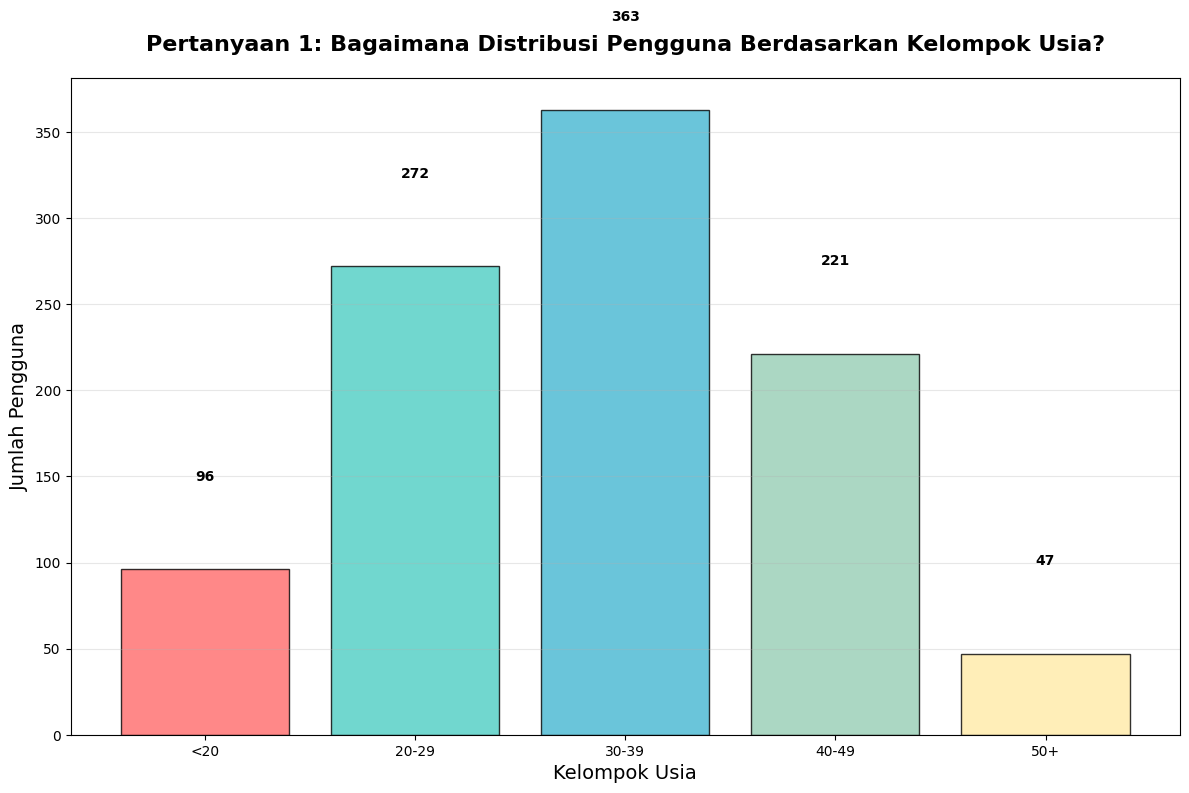

📊 JAWABAN 1: Kelompok usia 30-39 memiliki pengguna terbanyak (363 orang)


In [113]:
# =========================================================================
# BAR CHART 1: Distribusi Pengguna per Kelompok Usia
# =========================================================================
plt.figure(figsize=(12, 8))
age_distribution = integrated_data['age_group'].value_counts().sort_index()
bars = plt.bar(age_distribution.index, age_distribution.values,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'],
               alpha=0.8, edgecolor='black', linewidth=1)

# Menambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.title('Pertanyaan 1: Bagaimana Distribusi Pengguna Berdasarkan Kelompok Usia?',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Kelompok Usia', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📊 JAWABAN 1: Kelompok usia 30-39 memiliki pengguna terbanyak ({age_distribution.max():,} orang)")

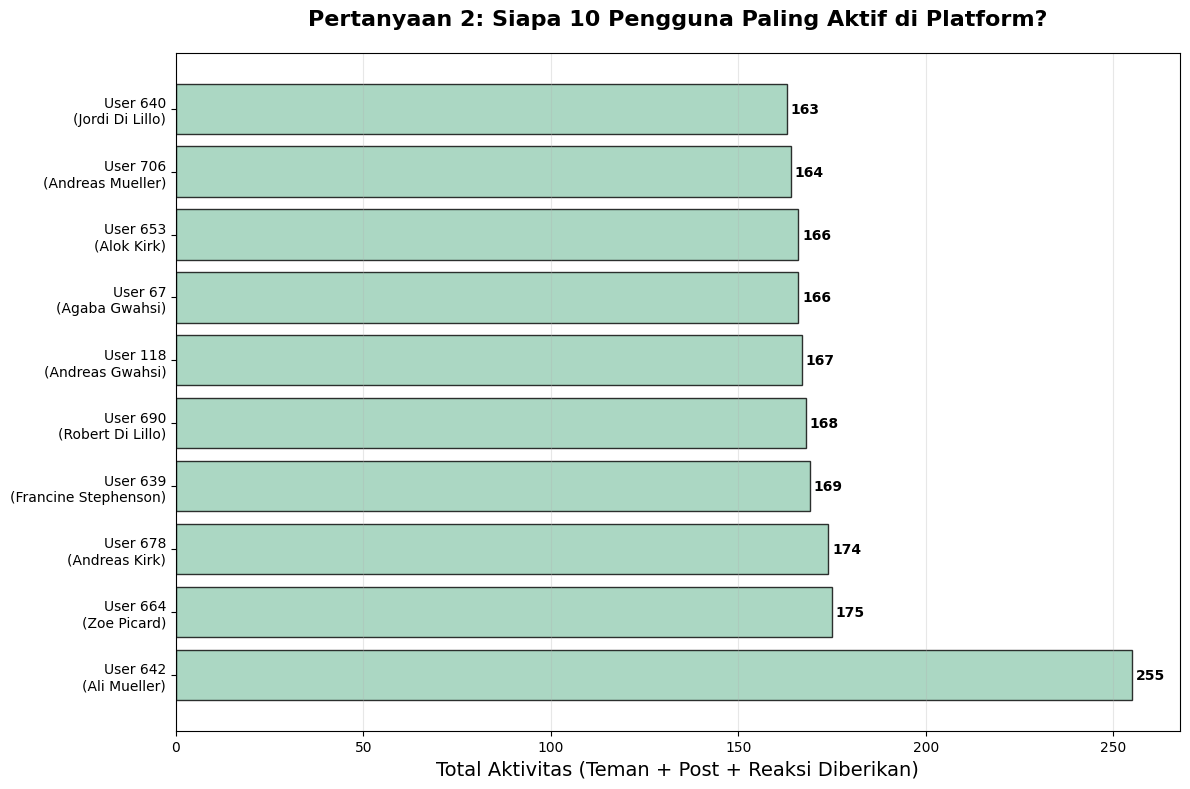

📊 JAWABAN 2: User 642 adalah yang paling aktif dengan total aktivitas 255


In [114]:
# =========================================================================
# BAR CHART 2: Top 10 Pengguna Paling Aktif (Berdasarkan Total Aktivitas)
# =========================================================================
plt.figure(figsize=(12, 8))
integrated_data['total_activity'] = (integrated_data['friend_count'] +
                                   integrated_data['post_count'] +
                                   integrated_data['reactions_given'])
top_active = integrated_data.nlargest(10, 'total_activity')

bars = plt.barh(range(len(top_active)), top_active['total_activity'],
               color='#96CEB4', alpha=0.8, edgecolor='black', linewidth=1)

# Menambahkan nilai di ujung bar
for i, (idx, row) in enumerate(top_active.iterrows()):
    plt.text(row['total_activity'] + 1, i, f"{int(row['total_activity'])}",
             va='center', fontweight='bold')

plt.yticks(range(len(top_active)),
          [f"User {int(row['user_id'])}\n({row['Name']} {row['Surname']})"
           for idx, row in top_active.iterrows()])
plt.title('Pertanyaan 2: Siapa 10 Pengguna Paling Aktif di Platform?',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Aktivitas (Teman + Post + Reaksi Diberikan)', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

most_active_user = top_active.iloc[0]
print(f"📊 JAWABAN 2: User {int(most_active_user['user_id'])} adalah yang paling aktif dengan total aktivitas {int(most_active_user['total_activity'])}")

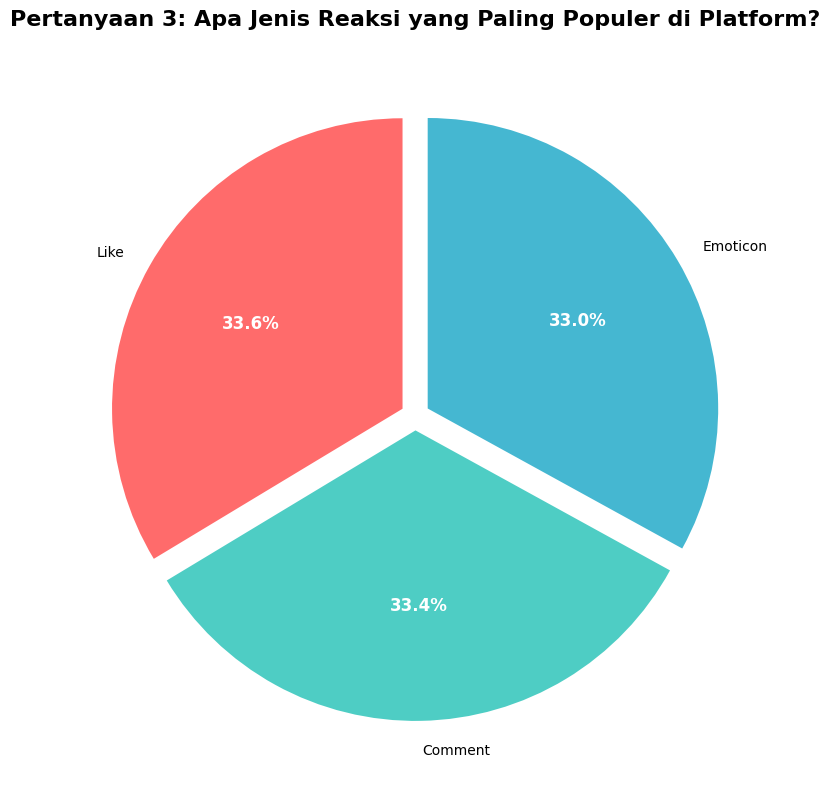

📊 JAWABAN 3: Reaksi 'Like' adalah yang paling populer (8,869 reaksi)


In [115]:
# =========================================================================
# PIE CHART 1: Proporsi Jenis Reaksi
# =========================================================================
plt.figure(figsize=(12, 8))
reaction_counts = reactions['Reaction Type'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
wedges, texts, autotexts = plt.pie(reaction_counts.values,
                                  labels=reaction_counts.index,
                                  autopct='%1.1f%%',
                                  colors=colors[:len(reaction_counts)],
                                  startangle=90,
                                  explode=[0.05] * len(reaction_counts))

# Memperbesar font
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.title('Pertanyaan 3: Apa Jenis Reaksi yang Paling Populer di Platform?',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

most_popular_reaction = reaction_counts.index[0]
print(f"📊 JAWABAN 3: Reaksi '{most_popular_reaction}' adalah yang paling populer ({reaction_counts.iloc[0]:,} reaksi)")

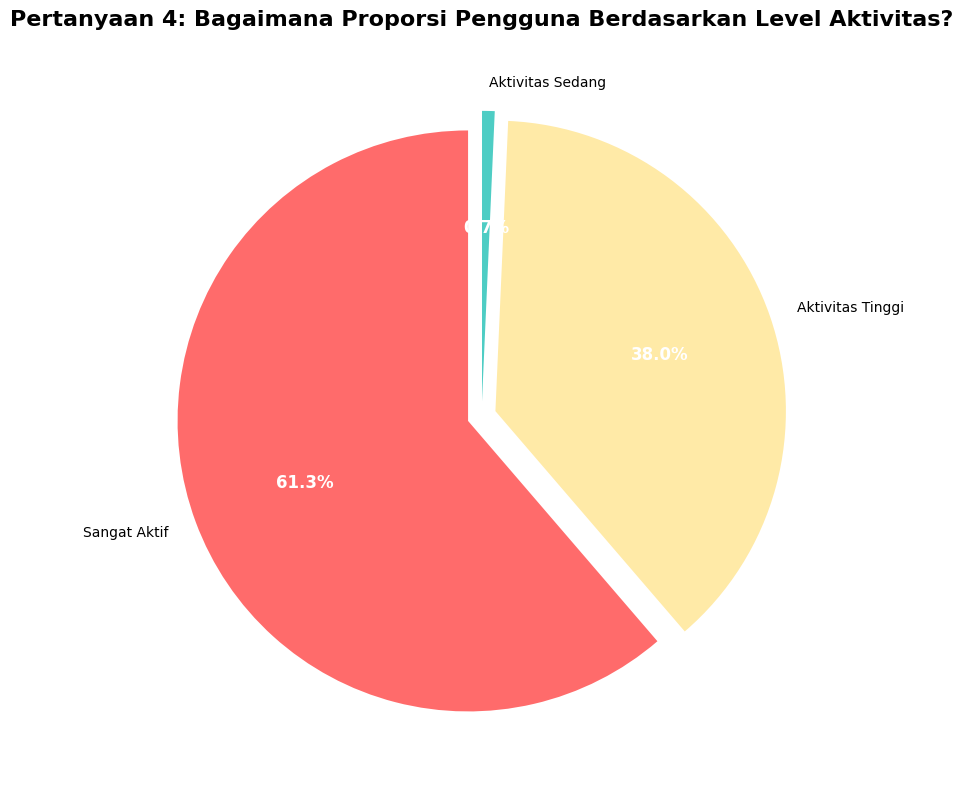

📊 JAWABAN 4: Mayoritas pengguna memiliki 'Sangat Aktif' (613 pengguna)


In [116]:
# =========================================================================
# PIE CHART 2: Proporsi Pengguna Berdasarkan Level Aktivitas
# =========================================================================
plt.figure(figsize=(12, 8))

# Kategorikan pengguna berdasarkan level aktivitas
def categorize_activity(row):
    if row['total_activity'] == 0:
        return 'Tidak Aktif'
    elif row['total_activity'] <= 5:
        return 'Aktivitas Rendah'
    elif row['total_activity'] <= 15:
        return 'Aktivitas Sedang'
    elif row['total_activity'] <= 30:
        return 'Aktivitas Tinggi'
    else:
        return 'Sangat Aktif'

integrated_data['activity_level'] = integrated_data.apply(categorize_activity, axis=1)
activity_counts = integrated_data['activity_level'].value_counts()

colors = ['#FF6B6B', '#FFEAA7', '#4ECDC4', '#96CEB4', '#DDA0DD']
wedges, texts, autotexts = plt.pie(activity_counts.values,
                                  labels=activity_counts.index,
                                  autopct='%1.1f%%',
                                  colors=colors[:len(activity_counts)],
                                  startangle=90,
                                  explode=[0.05] * len(activity_counts))

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.title('Pertanyaan 4: Bagaimana Proporsi Pengguna Berdasarkan Level Aktivitas?',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

dominant_level = activity_counts.index[0]
print(f"📊 JAWABAN 4: Mayoritas pengguna memiliki '{dominant_level}' ({activity_counts.iloc[0]:,} pengguna)")

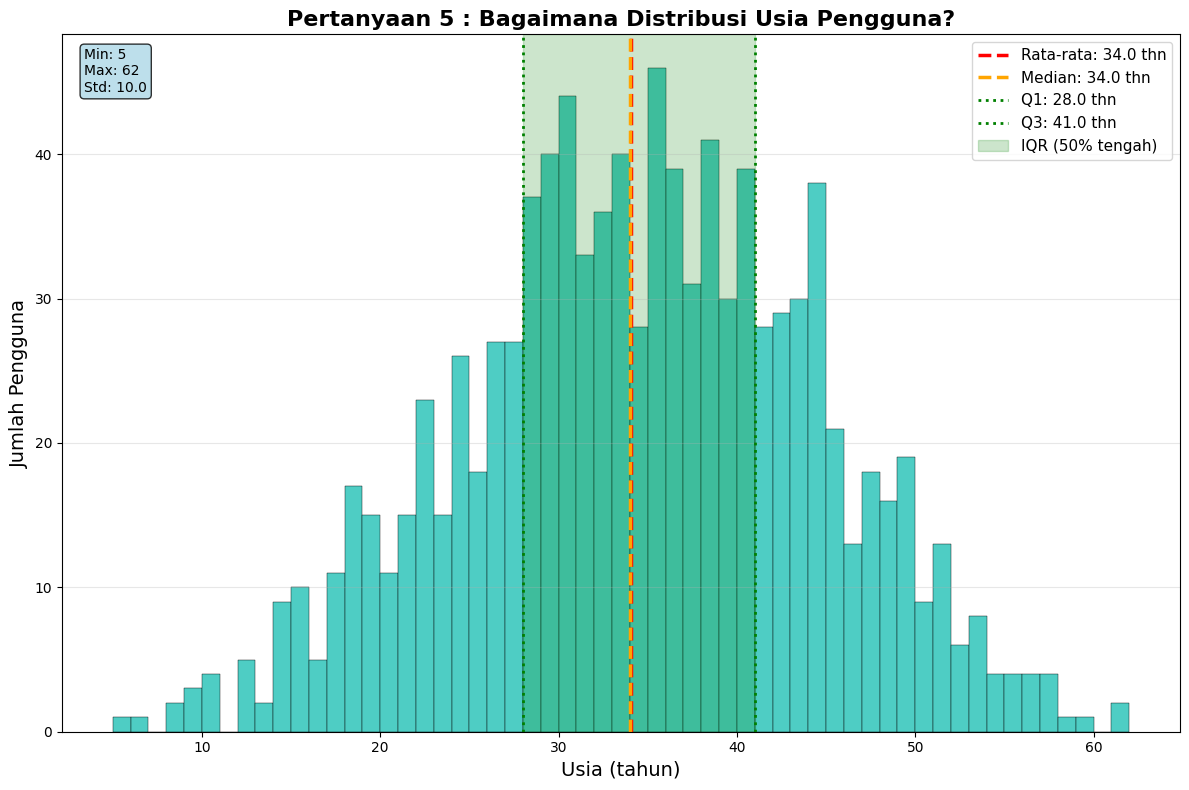

In [117]:
plt.figure(figsize=(12, 8))

# Filter usia valid
age_data = integrated_data['Age']
age_data = age_data[(age_data >= 0) & (age_data <= 100)]

# Histogram padat tanpa gap
bins = np.arange(age_data.min(), age_data.max() + 1, 1)
n, bins_used, patches = plt.hist(
    age_data,
    bins=bins,
    color='#4ECDC4',
    edgecolor='black',
    linewidth=0.3
)

# Garis rata-rata, median, kuartil
plt.axvline(age_data.mean(), color='red', linestyle='--', linewidth=2.5, label=f'Rata-rata: {age_data.mean():.1f} thn')
plt.axvline(age_data.median(), color='orange', linestyle='--', linewidth=2.5, label=f'Median: {age_data.median():.1f} thn')

q25, q75 = age_data.quantile(0.25), age_data.quantile(0.75)
plt.axvline(q25, color='green', linestyle=':', linewidth=2, label=f'Q1: {q25:.1f} thn')
plt.axvline(q75, color='green', linestyle=':', linewidth=2, label=f'Q3: {q75:.1f} thn')
plt.axvspan(q25, q75, alpha=0.2, color='green', label='IQR (50% tengah)')

plt.title('Pertanyaan 5 : Bagaimana Distribusi Usia Pengguna?', fontsize=16, fontweight='bold')
plt.xlabel('Usia (tahun)', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

stats_text = f'Min: {age_data.min():.0f}\nMax: {age_data.max():.0f}\nStd: {age_data.std():.1f}'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8),
         fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()


In [118]:
print(age_data.sort_values().head(10))  # Lihat 10 usia termuda yang valid


641     5
923     6
478     8
724     8
85      9
180     9
802     9
665    10
744    10
138    10
Name: Age, dtype: int64


In [119]:
print(integrated_data.columns)

Index(['user_id', 'Name', 'Surname', 'Age', 'Subscription Date',
       'friend_count', 'post_count', 'reactions_given', 'reactions_received',
       'age_group', 'registration_year', 'is_active_poster', 'is_social',
       'engagement_ratio', 'total_activity', 'activity_level'],
      dtype='object')


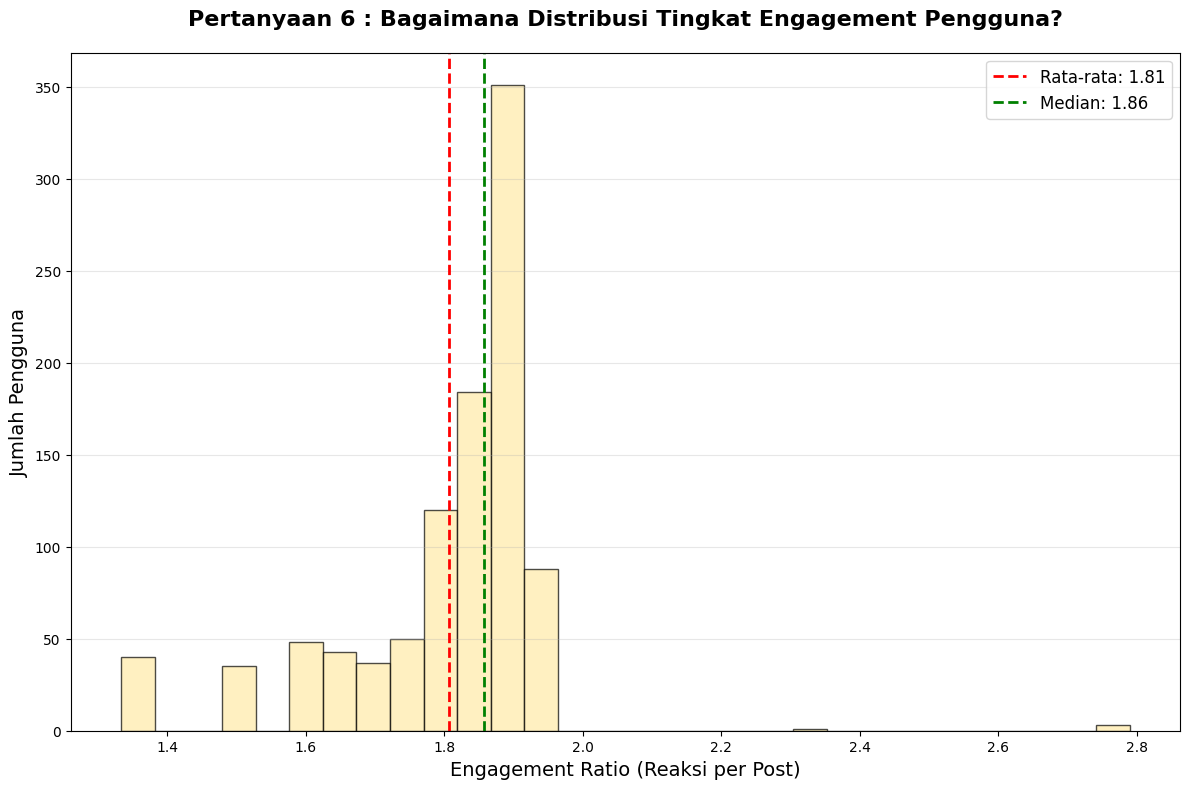

📊 JAWABAN 6 : 48.9% content creator memiliki engagement di atas median


In [120]:
# =========================================================================
# HISTOGRAM 2: Distribusi Engagement Ratio
# =========================================================================
plt.figure(figsize=(12, 8))
# Filter untuk pengguna yang pernah posting
posting_users = integrated_data[integrated_data['post_count'] > 0]
plt.hist(posting_users['engagement_ratio'], bins=30, color='#FFEAA7',
         alpha=0.7, edgecolor='black', linewidth=1)

plt.axvline(posting_users['engagement_ratio'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Rata-rata: {posting_users["engagement_ratio"].mean():.2f}')
plt.axvline(posting_users['engagement_ratio'].median(), color='green', linestyle='--',
            linewidth=2, label=f'Median: {posting_users["engagement_ratio"].median():.2f}')

plt.title('Pertanyaan 6 : Bagaimana Distribusi Tingkat Engagement Pengguna?',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Engagement Ratio (Reaksi per Post)', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

high_engagement_pct = (posting_users['engagement_ratio'] > posting_users['engagement_ratio'].median()).mean() * 100
print(f"📊 JAWABAN 6 : {high_engagement_pct:.1f}% content creator memiliki engagement di atas median")

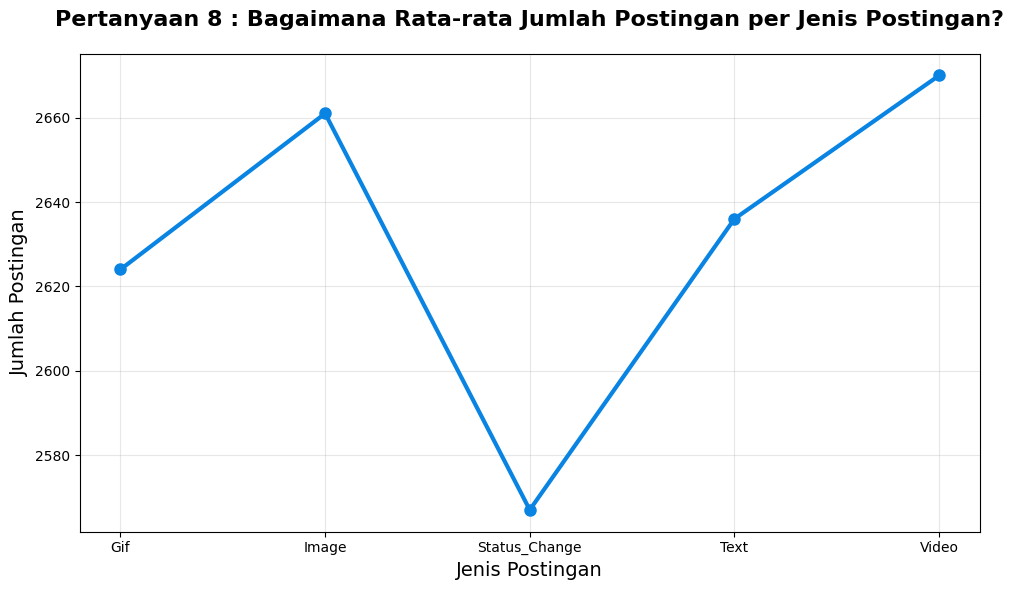

📊 JAWABAN 8 : Jenis postingan 'Video' memiliki jumlah postingan terbanyak yaitu 2670 postingan.


In [148]:
# =========================================================================
# LINE CHART 2: Rata-rata Jumlah Postingan per Jenis Postingan
# =========================================================================

plt.figure(figsize=(10, 6))

# Hitung rata-rata jumlah postingan per jenis post
post_type_activity = posts.groupby('Post Type')['post_id'].count().reset_index()
post_type_activity.columns = ['Post Type', 'Jumlah Postingan']

# Plot line chart
plt.plot(post_type_activity['Post Type'], post_type_activity['Jumlah Postingan'],
         marker='o', color='#0984e3', linewidth=3, markersize=8)

plt.title('Pertanyaan 8 : Bagaimana Rata-rata Jumlah Postingan per Jenis Postingan?',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Jenis Postingan', fontsize=14)
plt.ylabel('Jumlah Postingan', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Jawaban Singkat
most_post_type = post_type_activity.loc[post_type_activity['Jumlah Postingan'].idxmax()]
print(f"📊 JAWABAN 8 : Jenis postingan '{most_post_type['Post Type']}' memiliki jumlah postingan terbanyak yaitu {most_post_type['Jumlah Postingan']} postingan.")


In [142]:
print(posts.columns)


Index(['user_id', 'Post Type', 'Post Date', 'post_id'], dtype='object')


In [131]:
posts.columns


Index(['user_id', 'Post Type', 'Post Date', 'post_id'], dtype='object')

<ipython-input-127-a15cc2ff0b72>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_activity = integrated_data.groupby('age_group')[['friend_count', 'post_count',


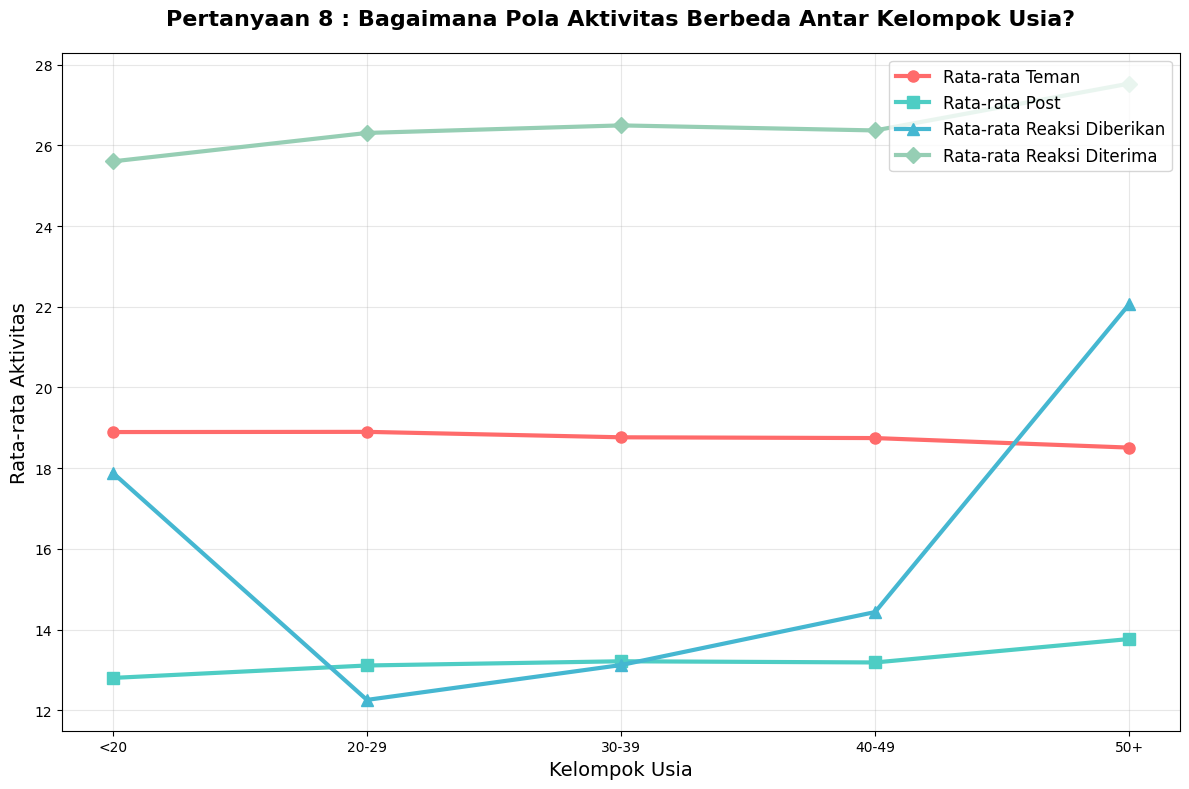

📊 JAWABAN 8 : Kelompok usia '50+' adalah yang paling aktif secara keseluruhan


In [127]:
# =========================================================================
# LINE CHART 2: Aktivitas Rata-rata per Kelompok Usia
# =========================================================================
plt.figure(figsize=(12, 8))
age_activity = integrated_data.groupby('age_group')[['friend_count', 'post_count',
                                                   'reactions_given', 'reactions_received']].mean()

plt.plot(age_activity.index, age_activity['friend_count'], marker='o', linewidth=3,
         markersize=8, label='Rata-rata Teman', color='#FF6B6B')
plt.plot(age_activity.index, age_activity['post_count'], marker='s', linewidth=3,
         markersize=8, label='Rata-rata Post', color='#4ECDC4')
plt.plot(age_activity.index, age_activity['reactions_given'], marker='^', linewidth=3,
         markersize=8, label='Rata-rata Reaksi Diberikan', color='#45B7D1')
plt.plot(age_activity.index, age_activity['reactions_received'], marker='D', linewidth=3,
         markersize=8, label='Rata-rata Reaksi Diterima', color='#96CEB4')

plt.title('Pertanyaan 8 : Bagaimana Pola Aktivitas Berbeda Antar Kelompok Usia?',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Kelompok Usia', fontsize=14)
plt.ylabel('Rata-rata Aktivitas', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

most_active_age_group = age_activity.sum(axis=1).idxmax()
print(f"📊 JAWABAN 8 : Kelompok usia '{most_active_age_group}' adalah yang paling aktif secara keseluruhan")

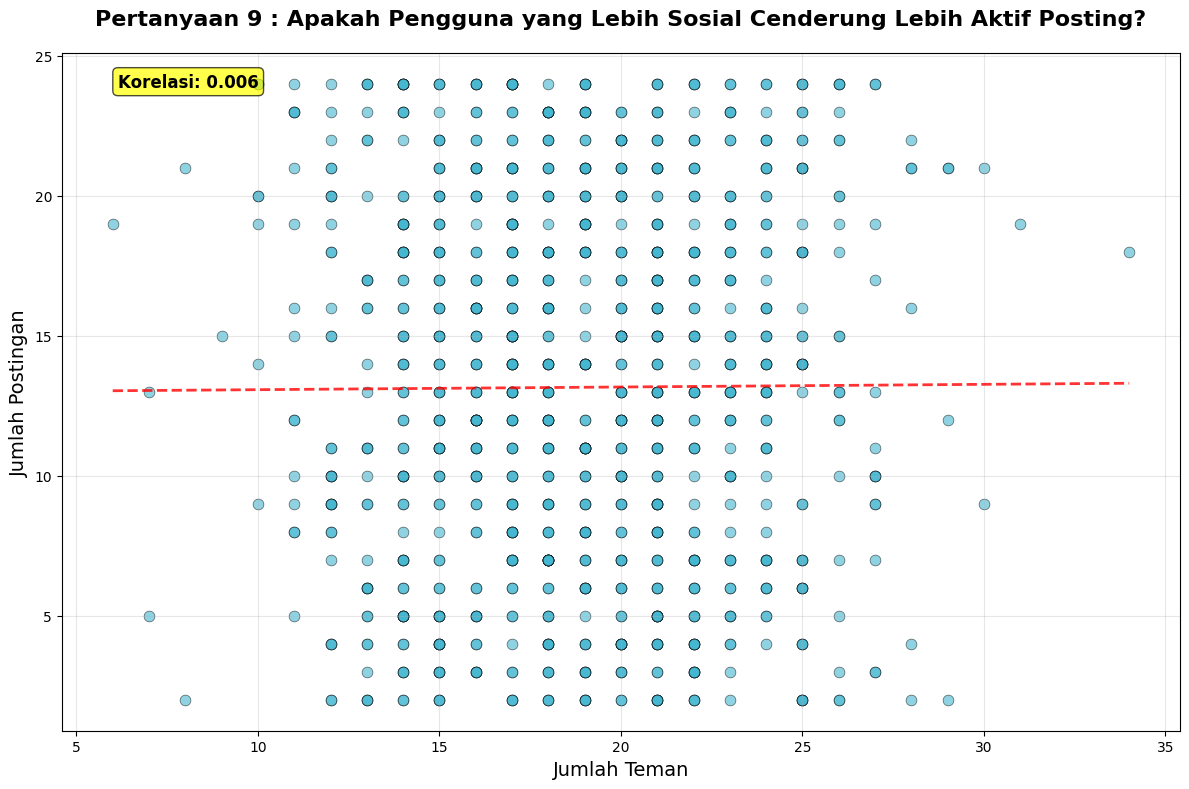

📊 JAWABAN 9 : Korelasi 0.006 menunjukkan hubungan yang lemah


In [123]:
# =========================================================================
# SCATTER PLOT 1: Hubungan Jumlah Teman vs Jumlah Post
# =========================================================================
plt.figure(figsize=(12, 8))
# Filter data untuk visualisasi yang lebih baik
filtered_data = integrated_data[(integrated_data['friend_count'] <= 50) &
                               (integrated_data['post_count'] <= 30)]

scatter = plt.scatter(filtered_data['friend_count'], filtered_data['post_count'],
                     alpha=0.6, s=60, color='#45B7D1', edgecolors='black', linewidth=0.5)

# Menambahkan trend line
z = np.polyfit(filtered_data['friend_count'], filtered_data['post_count'], 1)
p = np.poly1d(z)
plt.plot(filtered_data['friend_count'].sort_values(),
         p(filtered_data['friend_count'].sort_values()),
         "r--", alpha=0.8, linewidth=2)

correlation = integrated_data['friend_count'].corr(integrated_data['post_count'])
plt.title('Pertanyaan 9 : Apakah Pengguna yang Lebih Sosial Cenderung Lebih Aktif Posting?',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Jumlah Teman', fontsize=14)
plt.ylabel('Jumlah Postingan', fontsize=14)
plt.text(0.05, 0.95, f'Korelasi: {correlation:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
         fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📊 JAWABAN 9 : Korelasi {correlation:.3f} menunjukkan hubungan yang {'lemah' if abs(correlation) < 0.3 else 'sedang' if abs(correlation) < 0.7 else 'kuat'}")

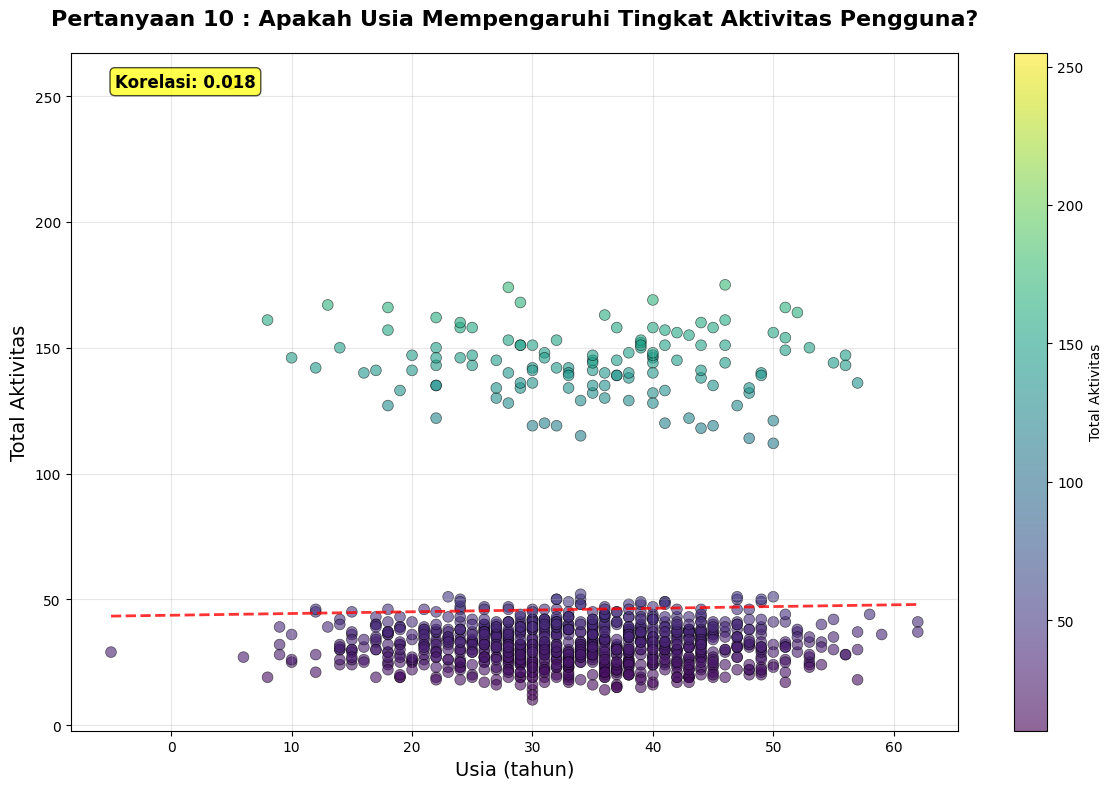

📊 JAWABAN 10m: Korelasi 0.018 menunjukkan tidak ada hubungan antara usia dan aktivitas


In [124]:
# =========================================================================
# SCATTER PLOT 2: Hubungan Usia vs Total Aktivitas
# =========================================================================
plt.figure(figsize=(12, 8))
scatter = plt.scatter(integrated_data['Age'], integrated_data['total_activity'],
                     alpha=0.6, s=60, c=integrated_data['total_activity'],
                     cmap='viridis', edgecolors='black', linewidth=0.5)

# Menambahkan trend line
z = np.polyfit(integrated_data['Age'], integrated_data['total_activity'], 1)
p = np.poly1d(z)
plt.plot(integrated_data['Age'].sort_values(),
         p(integrated_data['Age'].sort_values()),
         "r--", alpha=0.8, linewidth=2)

age_activity_corr = integrated_data['Age'].corr(integrated_data['total_activity'])
plt.colorbar(scatter, label='Total Aktivitas')
plt.title('Pertanyaan 10 : Apakah Usia Mempengaruhi Tingkat Aktivitas Pengguna?',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Usia (tahun)', fontsize=14)
plt.ylabel('Total Aktivitas', fontsize=14)
plt.text(0.05, 0.95, f'Korelasi: {age_activity_corr:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
         fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📊 JAWABAN 10m: Korelasi {age_activity_corr:.3f} menunjukkan {'tidak ada' if abs(age_activity_corr) < 0.1 else 'lemah' if abs(age_activity_corr) < 0.3 else 'sedang'} hubungan antara usia dan aktivitas")

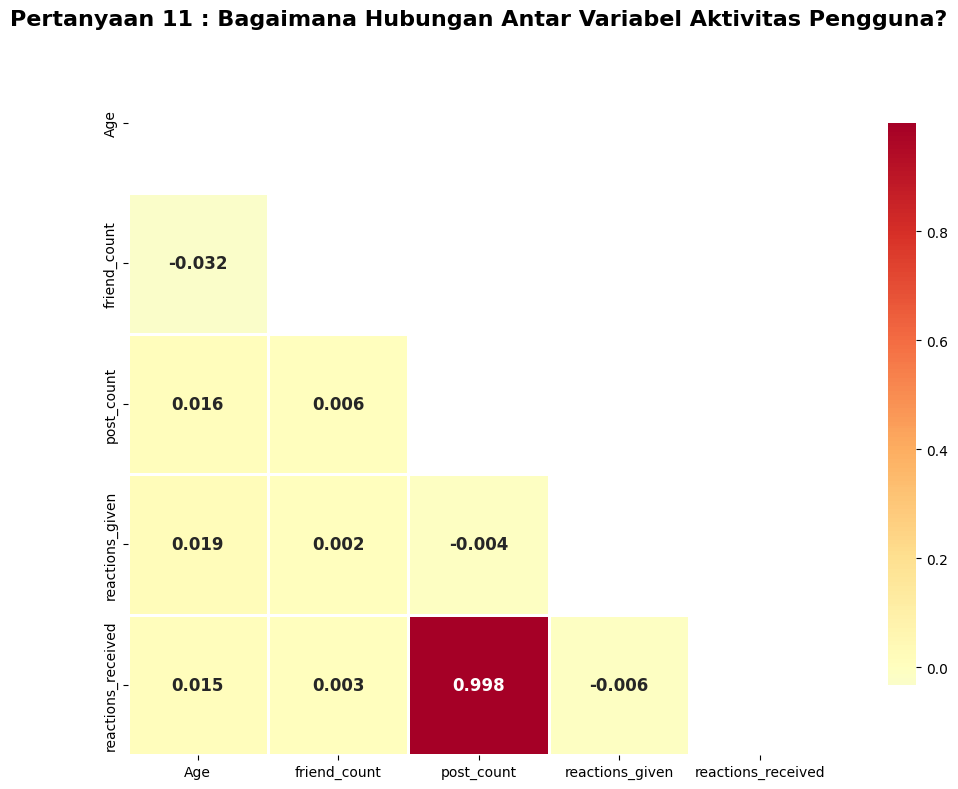

📊 JAWABAN 11 : Korelasi terkuat adalah 0.998


In [125]:
# =========================================================================
# HEATMAP 1: Korelasi Antar Variabel Aktivitas
# =========================================================================
plt.figure(figsize=(12, 8))
correlation_vars = ['Age', 'friend_count', 'post_count', 'reactions_given', 'reactions_received']
correlation_matrix = integrated_data[correlation_vars].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r',
                     center=0, square=True, linewidths=1, cbar_kws={"shrink": .8},
                     fmt='.3f', annot_kws={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Pertanyaan 11 : Bagaimana Hubungan Antar Variabel Aktivitas Pengguna?',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

strongest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
strongest_corr = strongest_corr[strongest_corr < 1.0].iloc[0]
print(f"📊 JAWABAN 11 : Korelasi terkuat adalah {strongest_corr:.3f}")

<ipython-input-126-20ed2132cc89>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_heatmap = integrated_data.groupby(['age_group', 'registration_year'])['total_activity'].mean().unstack()


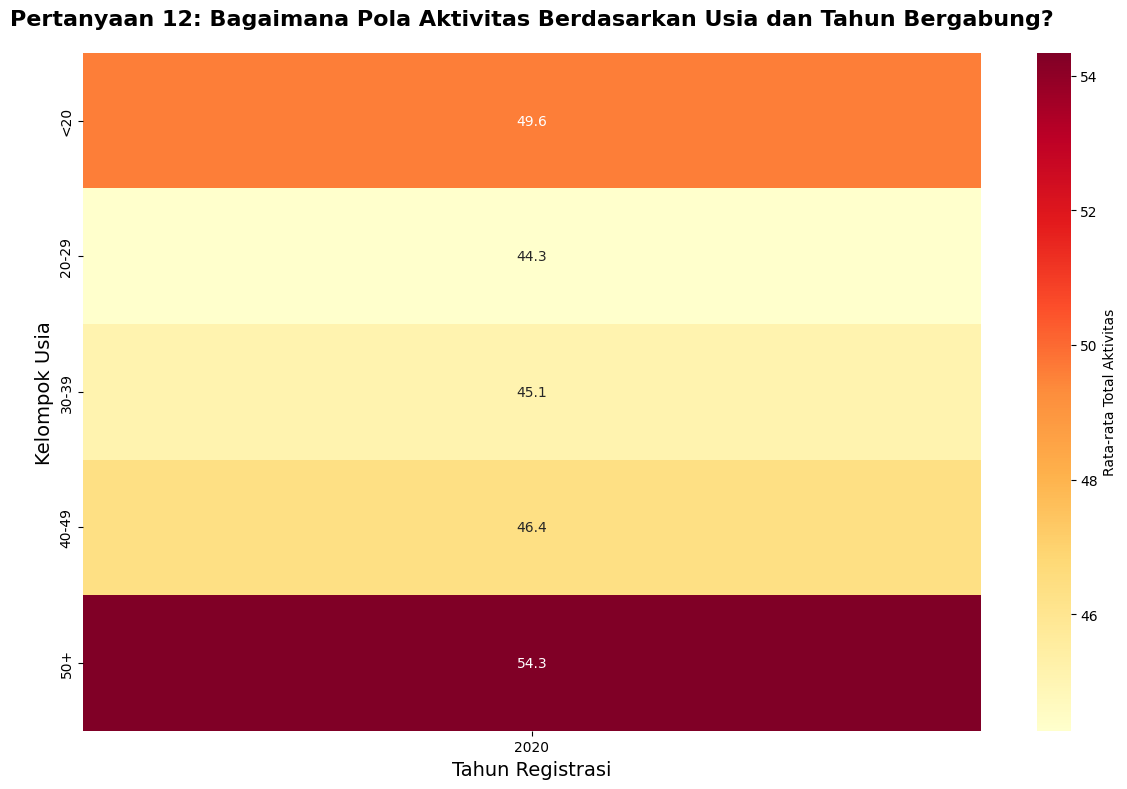

📊 JAWABAN 12: Kombinasi kelompok usia '50+' yang bergabung tahun 2020 memiliki aktivitas tertinggi (54.3)


In [126]:
# =========================================================================
# HEATMAP 2: Aktivitas per Kelompok Usia dan Tahun Registrasi
# =========================================================================
plt.figure(figsize=(12, 8))
activity_heatmap = integrated_data.groupby(['age_group', 'registration_year'])['total_activity'].mean().unstack()

heatmap = sns.heatmap(activity_heatmap, annot=True, cmap='YlOrRd',
                     cbar_kws={'label': 'Rata-rata Total Aktivitas'},
                     fmt='.1f', annot_kws={'fontsize': 10})

plt.title('Pertanyaan 12: Bagaimana Pola Aktivitas Berdasarkan Usia dan Tahun Bergabung?',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tahun Registrasi', fontsize=14)
plt.ylabel('Kelompok Usia', fontsize=14)
plt.tight_layout()
plt.show()

# Temukan kombinasi dengan aktivitas tertinggi
max_activity_combo = activity_heatmap.stack().idxmax()
max_activity_value = activity_heatmap.stack().max()
print(f"📊 JAWABAN 12: Kombinasi kelompok usia '{max_activity_combo[0]}' yang bergabung tahun {max_activity_combo[1]} memiliki aktivitas tertinggi ({max_activity_value:.1f})")
